<h1><p style="display: block; text-align: center;">Map it with Python!</p></h1>

<h3><p style="display: block; text-align: center;">Intro to GIS and Python's Mapping Modules</p></h3>

<h5><p style="display: block; text-align: center;">Christy Heaton</p></h5>

<h1><p style="display: block; text-align: center;">About me</p></h1>

![title](img/FS_bio.PNG) 

![title](img/maptimeseattle_website.PNG) 

Find us on [Meetup!](https://www.meetup.com/MaptimeSEA)

![title](img/psfblog_nbpy.PNG) 

<h1><p style="display: block; text-align: center;">This presentation is running inside of a Jupyter Notebook</p></h1>

In [1]:
import platform
print('Using Python version', platform.python_version())

Using Python version 3.7.0


<h1>Let's talk about maps</h1>

![title](img/wmata-metro-map.jpg) 

https://washington-org.s3.amazonaws.com/s3fs-public/styles/editorial_wide/public/wmata-metro-map.jpg

![title](img/00103052.jpg) 

Historic Petaluma Map Source: https://www.davidrumsey.com/luna/servlet/detail/RUMSEY~8~1~1173~100052:Map-of-Petaluma-City--1877-

<h2><p style="display: block; text-align: center;">Hasn't Everything Already Been Mapped?</p></h2>

<h2><p style="display: block; text-align: center;">Base Maps vs. Thematic Maps</p></h2>

## Base Maps

* Used as a reference

* They show you what's there, or a subset of what's there depending on scale

![title](img/nearmap_petaluma.PNG) 

Source: [Nearmap](https://go.nearmap.com/)

![title](img/stamen_maps.PNG) 

Source: [Stamen](http://maps.stamen.com)

### Not all base maps have been made because:

* Changes in landscapes and infrastructure

* Different colors

* Different scales

* Different features

## Thematic Maps

* A map with a theme (usually shown on top of a basemap)

* The theme is _there_, but would not be seen from above

![title](img/Climate-destabilisation.jpg) 

Source: [Geoawesomeness](https://i1.wp.com/geoawesomeness.com/wp-content/uploads/2016/10/Climate-destabilisation.jpg?fit=1303%2C766)

## Non-Earth Maps

![title](img/frodo_middleearth.jpg)

Middle Earth Map Source: https://www.reddit.com/r/lotr/comments/1870r9/map_of_characters_paths_through_the_books_my/

## What is GIS?

* A system that allows you to visualize, analyze, and store data to understand spatial relationships, patterns, and trends

* GIS is widely used in organizations of all sizes and in almost every industry

* A mix of data, science, analysis, and maps

## We use GIS to Answer _Where_ Questions

* Where is the Mystic Theater and how do I get there?

* Where should we build a store/wind turbine/solar panel?

* Where will the hurricane hit and what cities will be impacted?

* Where is the highest concentration of arsenic in our port?

* Where should we place advertisements so that people see them who are most likely to buy our product?

# Spatial Data - A Few Things to Know

![title](img/projection.png) 

## Depending on what projection you choose, you will get distortion in:

* Area
* Angles
* Shape
* Distance
* Direction


<h2>Coordinate Systems</h2>

![title](img/CoordSysPlane.png) 

![title](img/Geog_vs_Projected_CRS.png)

<h2>Geographic/Unprojected Coordinate System</h2>

![title](img/latlong-150.JPG)

![title](img/null_island_round.png)

![title](img/null_island_flat.png)

![title](img/epsgIO.png)

Source: [epsg.io](http://epsg.io/)

# Python Mapping Libraries

## [Matplotlib](https://matplotlib.org/)

#### A Python plotting library which produces publication quality maps and diagrams in both static and interactive formats. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## [Pandas](https://pandas.pydata.org/)

#### Provides high-performance, easy-to-use data structures and data analysis tools

## [GeoPandas](http://geopandas.org/)

#### Geographically-enabled Pandas, depends on [Shapely](https://github.com/Toblerity/Shapely) for manipulation and analysis of planar geometric objects

In [3]:
import pandas as pd
import geopandas as gpd

# Let's Start by Making a Simple Map

In [4]:
# GeoPandas comes with some data that we can quickly load in
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
# And check out the top few rows - notice it comes with attributes like population and GDP, 
# as well as geometry 
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [6]:
world.crs

{'init': 'epsg:4326'}

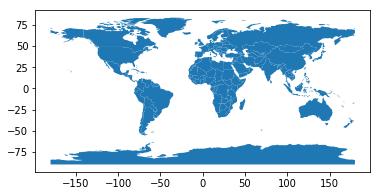

In [7]:
# Use the plot method to view the spatial component
world.plot()

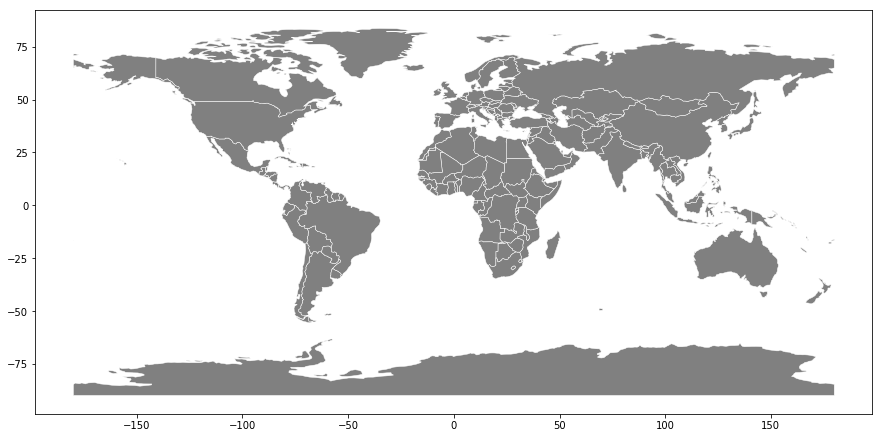

In [8]:
# You'll usually want to customize how your map looks
world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))

In [9]:
# GeoPandas also comes with some city data
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [10]:
# View the top few rows
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [11]:
cities.crs

{'init': 'epsg:4326'}

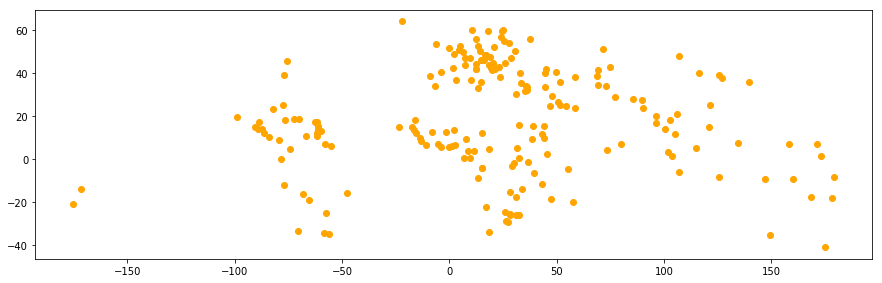

In [12]:
# And plot to view the spatial component
cities.plot(figsize=(15,10), color='orange')

In [13]:
world.crs == cities.crs

True

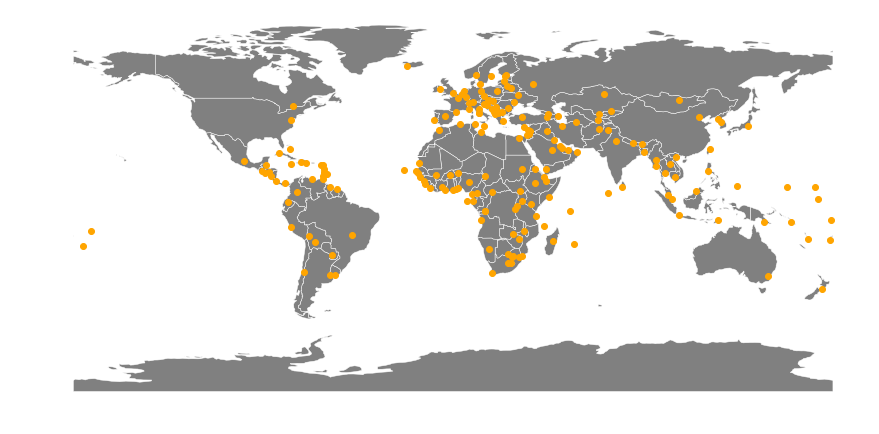

In [14]:
base = world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(ax=base, color='orange')
base.set_axis_off() 

# Spatial Problem: In what cities will we be able to see upcoming solar eclipses?

![title](img/Christy_eclipse.jpg)

![title](img/_alignment-lines-720.png)

An eclipse of the sun, or solar eclipse, happens when the moon moves between the sun and Earth. When this happens, the moon blocks the light of the sun from reaching Earth. There was a widely publicized solar eclipse that passed over the contiguous United States in 2017. Let's re-live the excitment by finding out where we can see solar eclipses in the future, using Python!

![title](img/Corona-2017-Aug-21-m.jpg)

In [15]:
# We'll need to load in some local data
import os
data_pth = "../Data/" 

In [16]:
# Load in Eclipse data
eclipses = gpd.read_file(os.path.join(data_pth, "Eclipses.shp"))

In [17]:
# Examine the first few rows
eclipses.head()

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1..."
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -..."
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -..."
3,0,Umbra,274.491359,757.922577,2021,POLYGON Z ((-51.18286999999998 -53.08708999999...
4,0,Umbra Limit (East),267.246357,31.230251,2023,POLYGON Z ((180.0000000000001 3.21677000000005...


In [18]:
# Check the coorindate reference system
eclipses.crs

{'init': 'epsg:4326'}

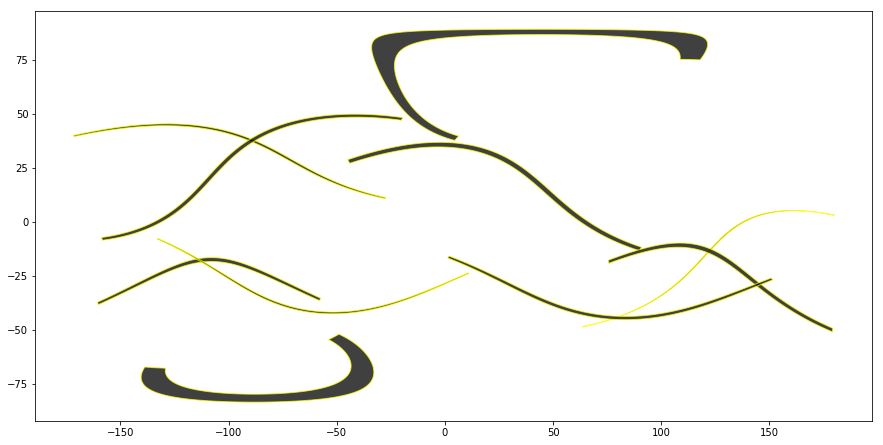

In [19]:
# And let's plot with a customized style
eclipses.plot(figsize=(15,10), color='black', edgecolor='yellow', alpha=0.75)

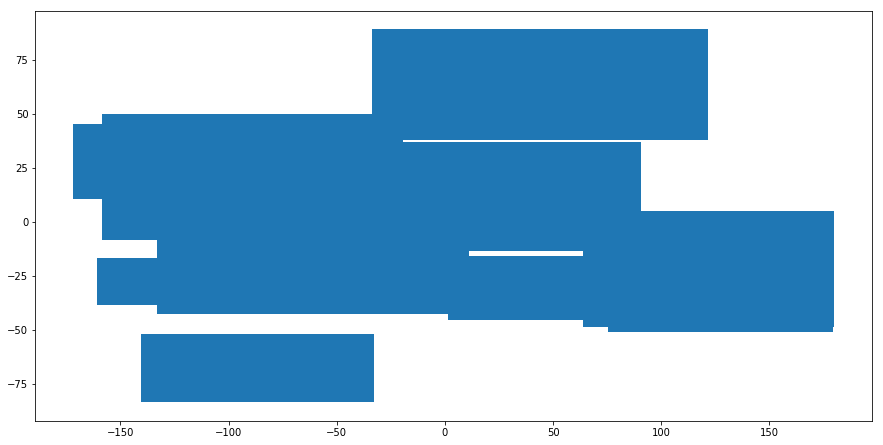

In [20]:
# GeoPandas let's you plot the minimum bounding box of each entity
eclipses.envelope.plot(figsize=(15,10))

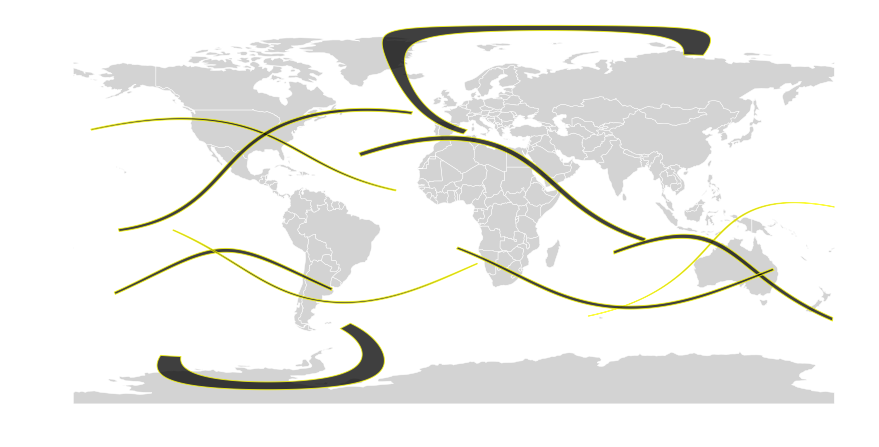

In [21]:
# Let's plot the eclipses on top of our world data
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
base.set_axis_off()

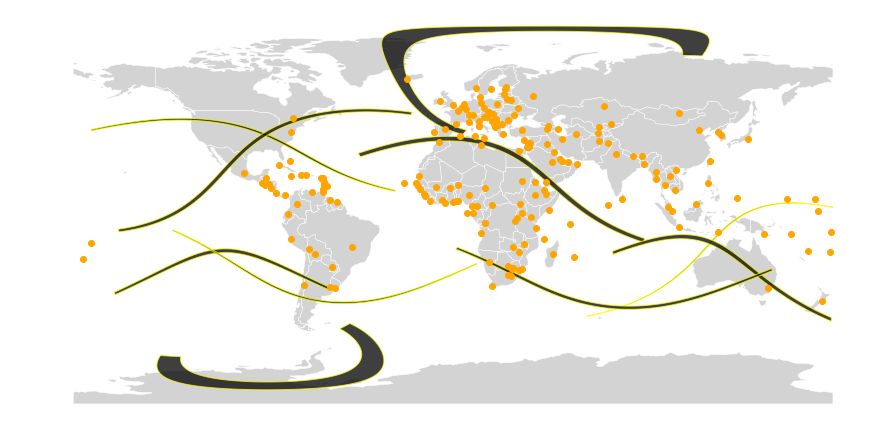

In [22]:
# Now we'll plot our basemap, our eclipse paths, and our cities
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(ax=base, color='orange')
base.set_axis_off()

In [23]:
# I have a dataset with a lot more cities in it, so let's redefine cities to use that
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [24]:
# And examine the first few rows
cities.head()

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry
0,Admin-1 capital,Colonia del Sacramento,Uruguay,Colonia,-34.479999,-57.840002,21714,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-57.84000247340134 -34.47999900541754)
1,Admin-1 capital,Trinidad,Uruguay,Flores,-33.543999,-56.900997,21093,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.90099656015872 -33.5439989373607)
2,Admin-1 capital,Fray Bentos,Uruguay,Río Negro,-33.138999,-58.303997,23279,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-58.3039974719095 -33.1389990288435)
3,Admin-1 capital,Canelones,Uruguay,Canelones,-34.538004,-56.284001,19698,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.28400149324307 -34.53800400667546)
4,Admin-1 capital,Florida,Uruguay,Florida,-34.099002,-56.214998,32234,0.0,America/Montevideo,Geonames ascii name + lat.d + long.d matching.,None,POINT (-56.21499844799416 -34.09900200521719)


In [25]:
# Check the crs of our new cities data
cities.crs

{'init': 'epsg:4326'}

In [26]:
# Is the cities data still in the same crs as the eclipse data? It needs to be to plot correctly!
world.crs == eclipses.crs == cities.crs

True

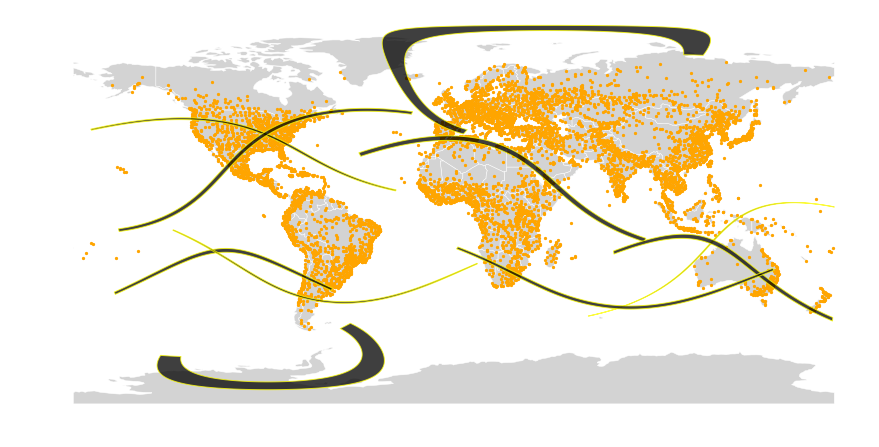

In [27]:
# Great. Let's plot it all again
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(ax=base, color='orange', markersize=5)
eclipses.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
base.set_axis_off()

In [28]:
# We can examine the years that we have data for
eclipses['Year']

0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

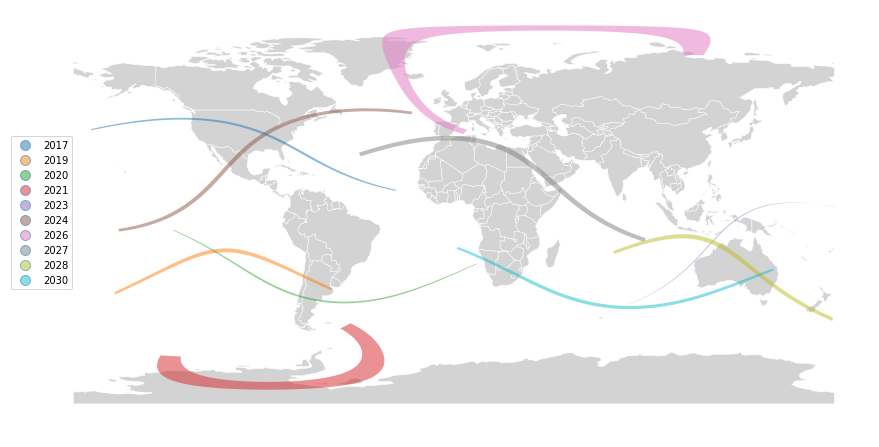

In [29]:
# But how do we know which is which?
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))

# We can add a catetorical value and set the column to Year. We can also add a legend.
eclipses.plot(ax=base, cmap='tab10', alpha=0.5, categorical = True, column = "Year", legend=True)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((.05,.7))

## Which eclipse will cover the largest population?

### Instead of coloring the eclipses by year, we want to color based on the number of people that ought to be able to see them

In [30]:
# Start by getting all the cities that intersect any eclipse, a spatial join using the geom column
allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')
allecities.head()

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry,index_right,OID_,Name,Shape_Leng,Shape_Area,Year
12,Admin-1 capital,Kasserine,Tunisia,Kasssrine,35.216703,8.716699,76243,0.0,None,"No GeoNames match due to small population, not...",None,POINT (8.716698503320458 35.21670310482421),7,0,Umbra,303.52546,325.721626,2027
13,Admin-1 capital,Sdid Bouzid,Tunisia,Sidi Bou Zid,35.016696,9.500004,42098,0.0,Africa/Tunis,GeoNames spatial join with similar names only.,None,POINT (9.500004482255633 35.01669607914971),7,0,Umbra,303.52546,325.721626,2027
15,Admin-1 capital,Mahdia,Tunisia,Mahdia,35.483913,11.040877,45977,0.0,None,None,None,POINT (11.04087661532196 35.48391304450269),7,0,Umbra,303.52546,325.721626,2027
427,Admin-1 capital,Bordj Bou Arréridj,Algeria,Bordj Bou Arreridj,36.059004,4.629996,140000,0.0,None,None,None,POINT (4.629996466405032 36.05900400826653),7,0,Umbra,303.52546,325.721626,2027
428,Admin-1 capital,M'sila,Algeria,M'Sila,35.700003,4.545001,150000,0.0,None,"No GeoNames match due to small population, not...",None,POINT (4.545000583879414 35.70000309604808),7,0,Umbra,303.52546,325.721626,2027


In [31]:
allecities = pd.DataFrame(allecities[['POP', 'Year']])

In [32]:
allecities.head()

,POP,Year
12,76243,2027
13,42098,2027
15,45977,2027
427,140000,2027
428,150000,2027


In [33]:
# Create a temporary variable to hold our years and populations
temp_group = allecities.groupby(['Year'])[["POP"]].sum()

In [34]:
temp_group

,POP
Year,
2017,6259810
2019,1064173
2020,352237
2023,103610
2024,27774481
2026,5410608
2027,22032732
2028,5175798
2030,4784330


In [35]:
# Add that column to our eclipse data, joining on the Year column
eclipses_pop = pd.merge(eclipses, temp_group, left_on='Year', right_index=True)

In [36]:
# Now we have populations associated with each eclipse
eclipses_pop.head()

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry,POP
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1...",6259810
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -...",1064173
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -...",352237
4,0,Umbra Limit (East),267.246357,31.230251,2023,POLYGON Z ((180.0000000000001 3.21677000000005...,103610
5,0,Umbra,315.537741,253.727828,2024,"POLYGON Z ((-158.5096 -7.820039999999949 0, -1...",27774481


In [37]:
# Sort the results to find out which eclipse will cover the most people
eclipses_pop.sort_values('POP', ascending = False)

,OID_,Name,Shape_Leng,Shape_Area,Year,geometry,POP
5,0,Umbra,315.537741,253.727828,2024,"POLYGON Z ((-158.5096 -7.820039999999949 0, -1...",27774481
7,0,Umbra,303.525460,325.721626,2027,POLYGON Z ((-44.46105999999997 27.958530000000...,22032732
0,0,Umbra,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1...",6259810
6,0,Umbra,431.598625,970.638404,2026,POLYGON Z ((113.4735000000001 75.0838800000000...,5410608
8,0,Umbra,952.489452,325.668986,2028,POLYGON Z ((75.66460000000018 -18.383469999999...,5175798
9,0,Umbra,318.125550,221.452683,2030,POLYGON Z ((1.61298000000005 -16.2127899999999...,4784330
1,0,Umbra,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -...",1064173
2,0,Umbra,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -...",352237
4,0,Umbra Limit (East),267.246357,31.230251,2023,POLYGON Z ((180.0000000000001 3.21677000000005...,103610


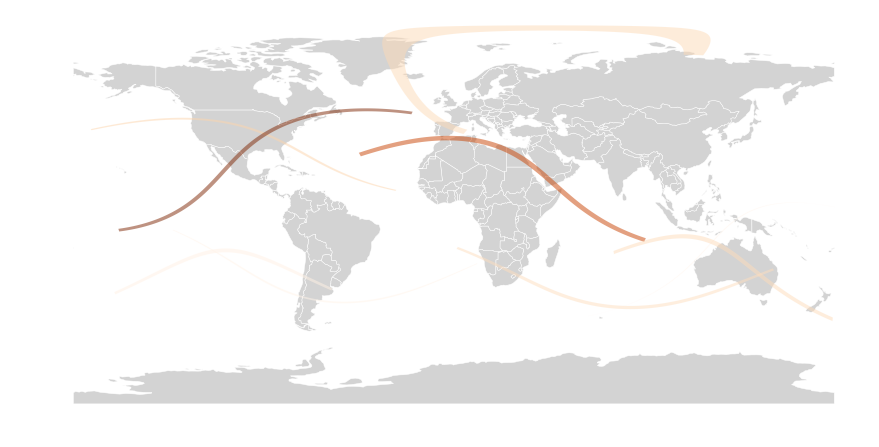

In [38]:
# Let's plot this
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses_pop.plot(ax=base, cmap='Oranges', alpha=0.5, column = "POP")
base.set_axis_off()

## Its the one coming up in 2024! Let's take a closer look at that one.

In [39]:
# Let's assign the 2024 eclipse to its own variable
myeclipse = eclipses[(eclipses['Year'] == 2024)]

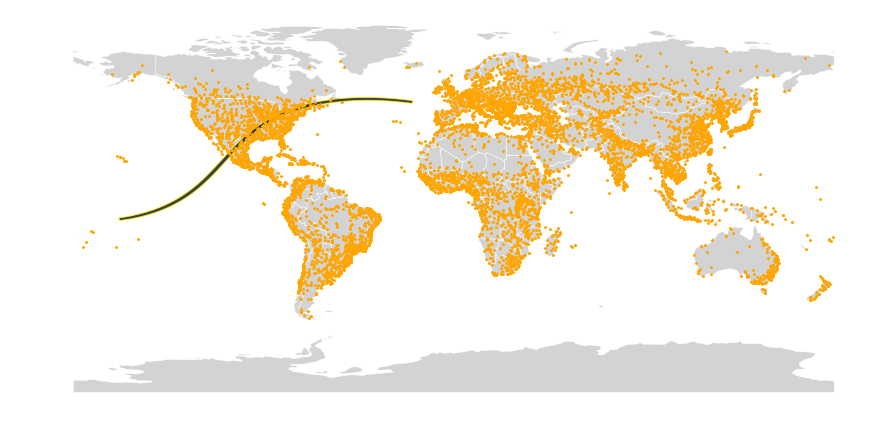

In [40]:
# Let's plot it 
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='*', color='orange', markersize=5, ax=base)
base.set_axis_off()

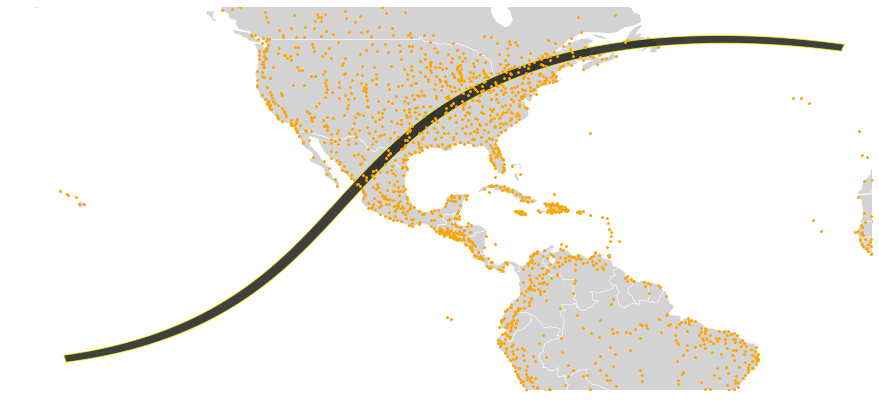

In [41]:
# Plot again, but this time I want to zoom in on that eclipse path
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='*', color='orange', markersize=5, ax=base)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

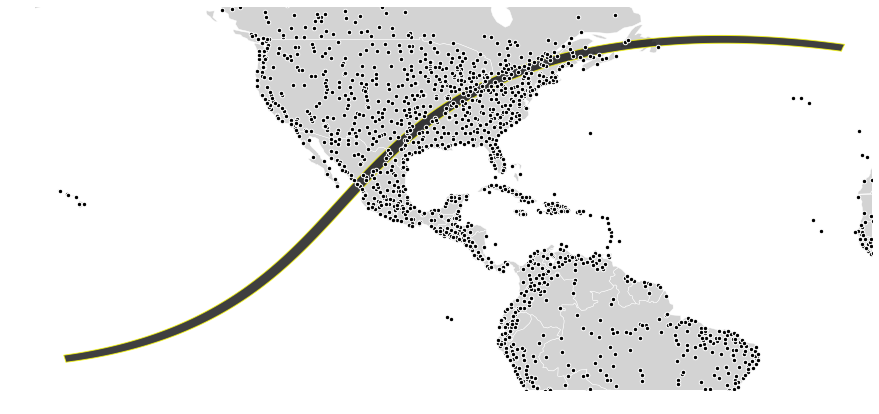

In [42]:
# Let's style the plot so that the eclipse looks eclipse-ier
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(ax=base, color='black', markersize=20, edgecolor='white')
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

In [43]:
# We can see that there are quite a few cities that intersect my path! But we want to know which ones.
# Do a spatial join to get the intersection
ecities = gpd.sjoin(cities, myeclipse, how='inner', op='intersects')
ecities.head()

,FEATURECLA,NAME,ADM0NAME,ADM1NAME,LATITUDE,LONGITUDE,POP,ELEVATION,TIMEZONE,GEONAMESNO,CITYALT,geometry,index_right,OID_,Name,Shape_Leng,Shape_Area,Year
584,Populated place,Paragould,United States of America,Arkansas,36.057087,-90.502884,23450,92.0,America/Chicago,Geonames ascii name + lat.d + long.d matching.,None,POINT (-90.5028843605005 36.05708721825965),5,0,Umbra,315.537741,253.727828,2024
616,Populated place,Cleburne,United States of America,Texas,32.351525,-97.392490,35545,233.0,America/Chicago,GeoNames match with ascii name + lat + long wh...,None,POINT (-97.39248966651769 32.35152528790633),5,0,Umbra,315.537741,253.727828,2024
627,Populated place,Arlington,United States of America,Texas,32.684761,-97.020238,724777,157.0,America/Chicago,Geonames ascii name + lat.d + long.d matching.,None,POINT (-97.02023848650327 32.68476076154036),5,0,Umbra,315.537741,253.727828,2024
641,Admin-1 capital,Montpelier,United States of America,Vermont,44.259972,-72.575813,8538,160.0,America/New_York,GeoNames match general.,None,POINT (-72.57581323412683 44.25997153632625),5,0,Umbra,315.537741,253.727828,2024
669,Populated place,Cape Girardeau,United States of America,Illinois,37.305822,-89.518087,40427,107.0,America/Chicago,Geonames ascii name + lat.d + long.d matching.,None,POINT (-89.51808659031434 37.30582236637662),5,0,Umbra,315.537741,253.727828,2024


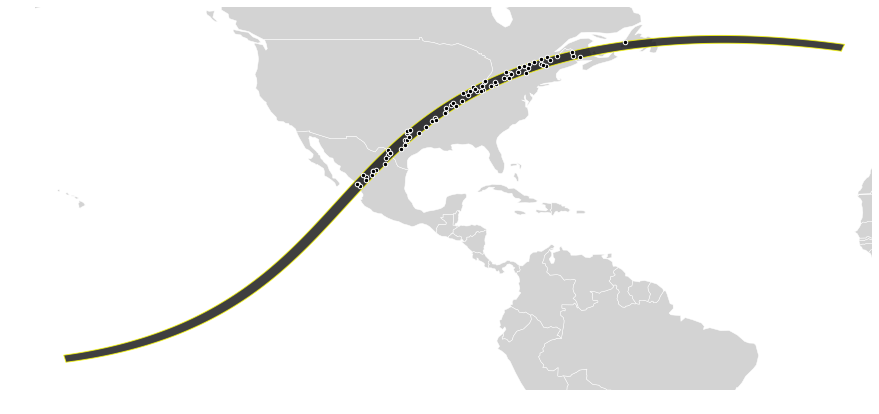

In [44]:
# Let's plot the results!
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(ax=base, color='black', markersize=20, edgecolor='white')
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

In [45]:
print('Wow! There are {} cities in the eclipse path!'.format(len(ecities)))
print("Here are the largest 10:")
print(ecities.sort_values('POP', ascending = False)['NAME'].head(10))

Wow! There are 74 cities in the eclipse path!
Here are the largest 10:
6270          Dallas
6369        Montréal
5968       Cleveland
5963     San Antonio
5433       Ft. Worth
5447    Indianapolis
5435          Austin
5607         Torreón
5974         Buffalo
4285          Dayton
Name: NAME, dtype: object


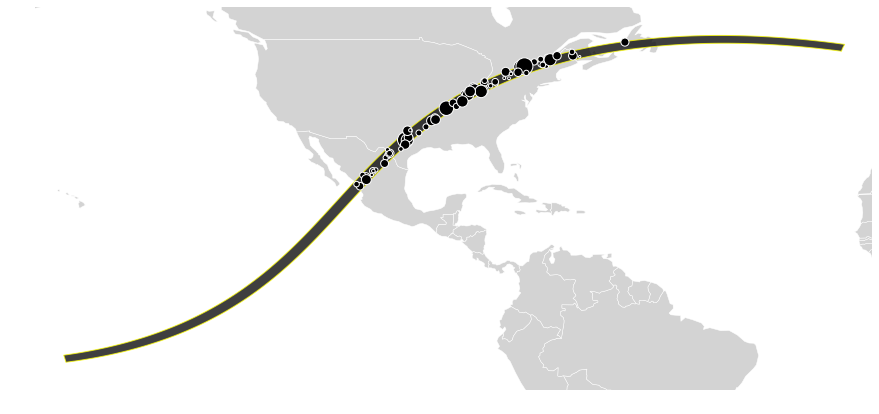

In [46]:
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
myeclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(ax=base, color='black', edgecolor='white', markersize=cities['POP']/1000)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

# Make it Slippy

## [Folium](https://python-visualization.github.io/folium/)

#### Binds the power of Python with leaflet.js

In [47]:
import folium

In [48]:
Petaluma = [38.23, -122.64]

osm_map = folium.Map(location=Petaluma, zoom_start=10)
osm_map

In [49]:
map_stamen_toner = folium.Map(
    location=Petaluma,
    tiles='stamentoner',
    zoom_start=10
)
map_stamen_toner

In [50]:
map_stamen_water = folium.Map(
    location=Petaluma,
    tiles='stamenwatercolor',
    zoom_start=10
)
map_stamen_water

In [51]:
# Let's find the centroid of the eclipse we chose, so that we can center our folum map on it
x = myeclipse.centroid.x.values[0]
y = myeclipse.centroid.y.values[0]
print('y: ' + str(y) + ', x: ' + str(x))

y: 26.719700290214362, x: -93.295094820787


In [52]:
map_stamen_water = folium.Map(
    location=[y,x],
    tiles='stamenwatercolor',
    zoom_start=4
)

folium.GeoJson(ecities,name='Eclipse Cities').add_to(map_stamen_water)
folium.GeoJson(myeclipse,name='Eclipse Path').add_to(map_stamen_water)

folium.LayerControl().add_to(map_stamen_water)

In [53]:
map_stamen_water

In [54]:
# You can write a function that creates a map with all of your properties
# This one creates popups for your cities

def plot_city_pop(ecities, myeclipse):
    # generate a new map
    folium_map = folium.Map(location=[y, x], zoom_start=4, tiles="stamenwatercolor")
    folium.GeoJson(myeclipse,name='Eclipse Path').add_to(folium_map)
    # for each row in the data, add a cicle marker
    for index, row in ecities.iterrows():
        
        # generate the popup message that is shown on click.
        popup_text = "Name: {}<br> Pop: {}"
        popup_text = popup_text.format(row["NAME"], row["POP"])
        
        folium.CircleMarker(location=(row['geometry'].y, row['geometry'].x),radius=6,popup=popup_text,fill=True).add_to(folium_map)        

    # Add a layer control if you like
    folium.LayerControl().add_to(folium_map)
    
    return folium_map

In [55]:
# Call the function to create the map
plot_city_pop(ecities, myeclipse)

<h1>Happy Mapping!</h1>

In [56]:
plot_city_pop(ecities, myeclipse)